<a href="https://colab.research.google.com/github/janedwinperez/final_redes_neuronales/blob/main/Grupo_Trabajo_Final_Redes_Neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Descripción trabajo final**

<p>
  1. Analizar el código paso a paso y entenderlo y realizar una breve explicación de como funciona.<br>
  2. Realizar módificaciones variando parámetros como la cantidad de neuronas, tipo de optimizador, funciones de activación, funciones de perdida y tamaños de entrada de la imagen.<br>
  3. A partir del entendimiento del código en el punto 1 responda las siguientes preguntas: <br>
  <ul>
    <li> ¿Cual es el objetivo de categorizar los targets o labels correspondientes a cada imagen? </li>
    <li> ¿En que me ayuda la normalización a la hora de entrenar los datos? </li>
  </ul>
  <p>
  4. Realice un informe detallando los resultados obtenidos en el punto 2. El informe debe responder las siguiente preguntas:
  <ul>
    <li> ¿Cómo variaron los resultados con el aumento o disminución de las neuronas?</li>
    <li> ¿Cómo cambia la presición del modelo propuesto, al cambiar la función de activación, que se logra observar de los resultados?</li>
    <li> ¿Cuál sería a su criterio la función de activación que se adapta al presente análisis ?</li>
    <li> ¿Cómo se comportaron los resultados de las funciones de perdidas analizadas?</li>
    <li> ¿Mejoraron los resultados al reducir o aumentar el tamaño de entrada de la imagen?</li>
    <li> ¿Cuál fue la mejor solución que logró encontrar y por qué?</li>

  </ul>

  Nota: El informe debe llevar los valores que probaron en el módelo y para lo cuál como minimo se deben analizar 4 optimizadores,4 funciones de activación, 4 funciones de perdida, 4 opciones de neuronas y tamaños de entrada de la imagen. <br>
<p>
  5. Concluir en que casos se debe utilizar los optimizadores,funciones de perdida, funciones de activación y tener en cuenta que se debe presentar una gráfica representativa de cada función de activación describiendo los rangos de la función y su comportamiento.
</p>

##**Porcentajes de calificación:**


1.   Punto 1 : 10%
2.   Punto 2 : 10%
3.   Punto 3 : 10%
4.   Punto 4 : 25%
5.   Punto 5 : 15%
6.   Sustentación : 30%


##**Limitantes**
   Grupos máximo de 3 personas y mínimo de 2 personas


In [ ]:
# Se instala la libreria de tensorflow
!pip install tensorflow

In [ ]:
#Se instala la biblioteca de keras
!pip install keras

In [ ]:
#Se importa o se carga la biblioteca de numpy
import numpy as np
from keras import layers, models
from keras.utils import to_categorical
#Cargamos los datasets (bases de datos) que se encuentran en keras.datasets
from keras.datasets import mnist
#Se carga la biblioteca de matplotlib la cual nos permite hacer graficas
import matplotlib.pyplot as plt



En la base de datos existen unos datos que se van a clasificar. Lo anterior corresponde a la data. Esos datos corresponde a digitos que aparecen en ciertas
imagenes. Tambien se tiene una clasificacion que son los numero del 0 al 9 y a eso le llamamos labels. Tanto data como labels se dividen en dos grupos
que son los datos de entrenamiento (train) y de prueba (test)

In [ ]:
#Se dividen los datos en datos de entrenamiento (train_data, train_labels) y datos de prueba (test_data, test_labels)

(train_data, train_labels), (test_data, test_labels) =mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
#Se imprime el tipo de train_data
print(type(train_data))
#Se imprime el train_data
train_data

<class 'numpy.ndarray'>


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
#Se imprimen las dimensiones del train_data
#El resultado nos indica que tenemos 60 mil imagenes de 28 pixeles por 28 pixeles
train_data.shape

(60000, 28, 28)

In [ ]:
#Imprimimos las dimensiones del primer dato del train_data
print(train_data[0].shape)

(28, 28)


In [ ]:
#Verificamos el tamaño de los datos de prueba. Por todo lo anterior podemos concluir que la data a sido dividida en un 50%
#El 50% son datos para el entrenamiento y
print(train_data.shape)

(60000, 28, 28)


(28, 28)


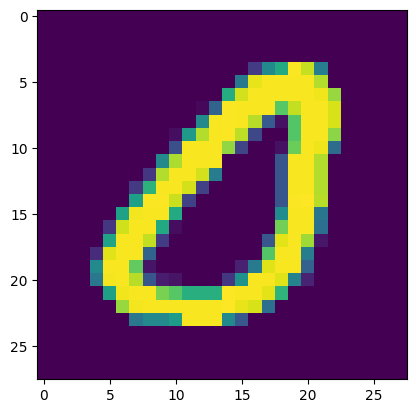

In [ ]:
print(train_data[689].shape)
plt.imshow(train_data[689])

In [ ]:
train_labels[689]

0

In [ ]:
"""
Utilizamos un modelo secuencial. En redes neuronales existen tres tipos de modelos: modelos secuenciales, modelos funcionales y modelos
y modelos de subclase
"""
model = models.Sequential()
#Definimos como unidades de entrada vectores cuya dimension es de 784 posiciones y como unidades de salida vectores de 512 posiciones
model.add(layers.Dense(512,activation='relu', input_shape=(28*28,)))
#Como estamos trabajando con un algoritmo de clasificacion y solo tenemos 10 posibilidades definimos un vector de salida de 10 posiciones
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics= ['accuracy', 'Precision'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Redimensionamos el tensor pasandolo de tres dimensiones a uno de dos dimensiones
x_train = train_data.reshape((60000,28*28))
#Se Normalizan los datos
x_train = x_train.astype('float32')/255

#Idem al tratamiento del bloque anterior
x_test = test_data.reshape((10000,28*28))
x_test = x_test.astype('float32')/255

In [ ]:
#Se imprime el prime dato del x_train para verificar su configuracion
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
#Se categorizan los datos de salida ya que este es un problema de clasificacion de 10 elementos (0-9)
y_train = to_categorical(train_labels)
y_test =to_categorical(test_labels)

In [ ]:
train_labels[0]

5

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
#Se entrena el modelo con el metodo fit
history = model.fit(x_train, y_train, epochs=6, batch_size=128)

Epoch 1/6
469/469 [==============================] - 5s 10ms/step - loss: 0.0252 - accuracy: 0.9922 - precision: 0.9933
Epoch 2/6
469/469 [==============================] - 5s 12ms/step - loss: 0.0174 - accuracy: 0.9952 - precision: 0.9958
Epoch 3/6
469/469 [==============================] - 5s 10ms/step - loss: 0.0137 - accuracy: 0.9964 - precision: 0.9968
Epoch 4/6
469/469 [==============================] - 5s 10ms/step - loss: 0.0095 - accuracy: 0.9978 - precision: 0.9980
Epoch 5/6
469/469 [==============================] - 5s 11ms/step - loss: 0.0077 - accuracy: 0.9981 - precision: 0.9983
Epoch 6/6
469/469 [==============================] - 5s 10ms/step - loss: 0.0061 - accuracy: 0.9987 - precision: 0.9987


In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0636 - accuracy: 0.9828 - precision: 0.9841


[0.06363767385482788, 0.9828000068664551, 0.9840697050094604]

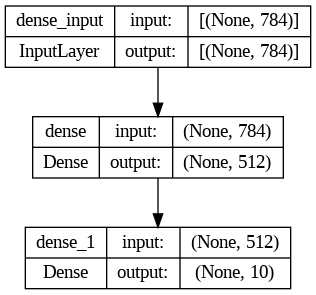

In [ ]:
# Visualización
from keras.utils import plot_model
plot_model(model, to_file='model_sequential.png',show_shapes=True, show_layer_names=True)

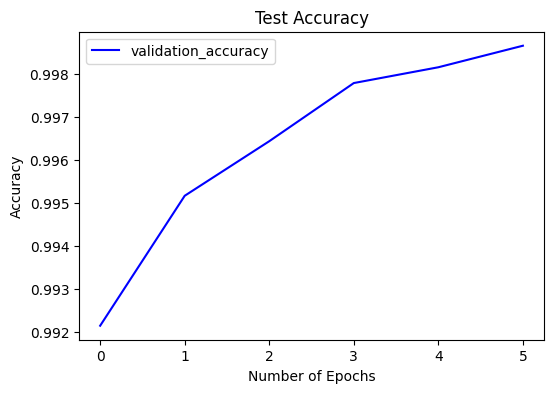

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(history.history["accuracy"],color="b",label="validation_accuracy")
#plt.plot(history.history['Precision'],color="r",label="validation_precision")
plt.title("Test Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
import pandas as pd
predictions = model.predict(x_test)


predictions_df = pd.DataFrame({'ImageId': range(1, len(predictions) + 1), 'Label': predictions.argmax(axis=1)})
predictions_df

313/313 [==============================] - 2s 5ms/step


,ImageId,Label
0,1,7
1,2,2
2,3,1
3,4,0
4,5,4
...,...,...
9995,9996,2
9996,9997,3
9997,9998,4
9998,9999,5


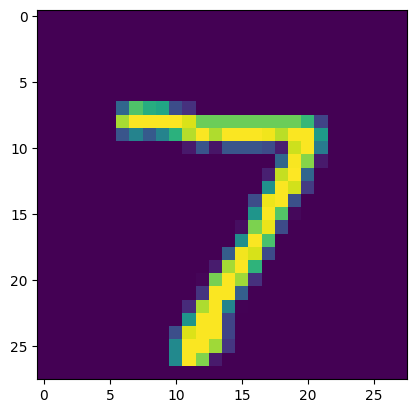

In [ ]:
plt.imshow(test_data[0])